In [353]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [355]:
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [356]:
import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

In [357]:
data=pd.read_csv('Train Data.csv')

In [358]:
data.head()

,age,job,marital,education,connect,balance,landline,smart,last_day,last_month,duration,campaign,passdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,0
3,51,retired,married,primary,no,229,yes,no,5,may,353,1,-1,0,unknown,0
4,57,blue-collar,married,primary,no,52,yes,no,5,may,38,1,-1,0,unknown,0


In [396]:
data['jobs'].series.unique()

KeyError: 'jobs'

In [391]:
data.shape

(40508, 16)

In [360]:
X=data.drop(['target'],axis=1)
Y=data['target']
X.shape

(40508, 15)

Text(0, 0.5, 'Frequency of Purchase')

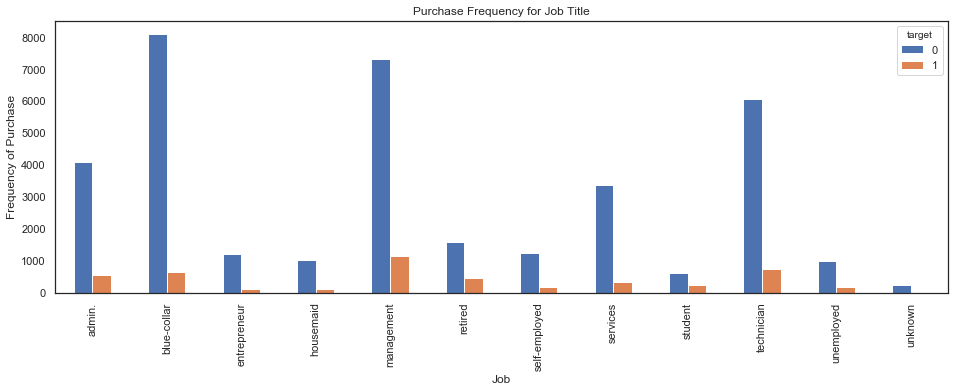

In [397]:
%matplotlib inline
pd.crosstab(data['job'],Y).plot(kind='bar',figsize=(16, 5))
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')



## The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

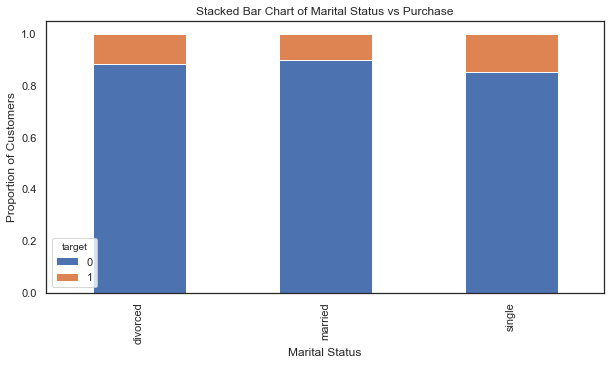

In [374]:
table=pd.crosstab(data['marital'],data['target'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize = (10,5))
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')


## The marital status does not seem a strong predictor for the outcome variable.


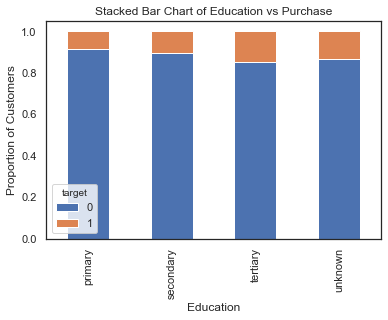

In [376]:
table=pd.crosstab(data['education'],data['target'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')


## Education seems a good predictor of the outcome variable.

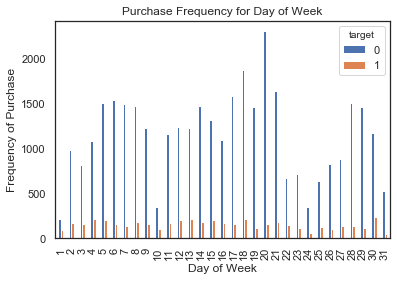

In [378]:
pd.crosstab(data['last_day'],data['target']).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')


## Day of week may not be a good predictor of the outcome.


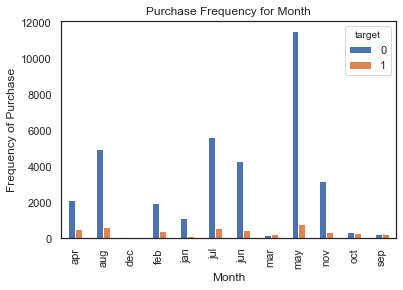

In [381]:
pd.crosstab(data['last_month'],data['target']).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')


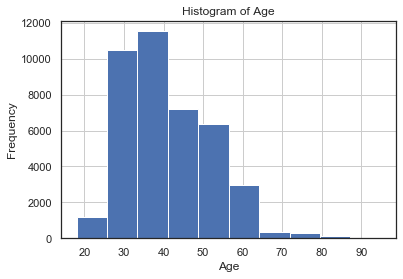

In [385]:
data['age'].hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')


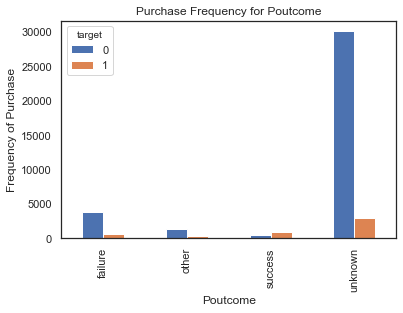

In [387]:
pd.crosstab(data['poutcome'],data['target']).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')


In [299]:
X=pd.get_dummies(X)

In [301]:
X.head()

,age,balance,last_day,duration,campaign,passdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,last_month_jun,last_month_mar,last_month_may,last_month_nov,last_month_oct,last_month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,51,229,5,353,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,57,52,5,38,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [304]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
40503    1
40504    1
40505    1
40506    0
40507    0
Name: target, Length: 40508, dtype: int64

In [305]:
X.shape

(40508, 48)

In [234]:
 X.to_csv("training_X.csv")

In [306]:
Y.to_csv("test_Y.csv")

In [307]:
X.columns 


Index(['age', 'balance', 'last_day', 'duration', 'campaign', 'passdays',
       'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'connect_no', 'connect_yes', 'landline_no',
       'landline_yes', 'smart_no', 'smart_yes', 'last_month_apr',
       'last_month_aug', 'last_month_dec', 'last_month_feb', 'last_month_jan',
       'last_month_jul', 'last_month_jun', 'last_month_mar', 'last_month_may',
       'last_month_nov', 'last_month_oct', 'last_month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [237]:
X=X.drop(['job_blue-collar'],1)

In [238]:
X=X.drop(['last_month_jun'],1)

In [239]:
X=X.drop(['poutcome_other'],1)

In [240]:
X=X.drop(['marital_divorced'],1)

In [241]:
X=X.drop(['connect_no'],1)

In [242]:
X=X.drop(['landline_no'],1)

In [243]:
X=X.drop(['smart_no'],1)

In [244]:
X=X.drop(['education_primary'],1)

In [245]:
X.shape

(40508, 40)

In [246]:
X.head()


,age,balance,last_day,duration,campaign,passdays,previous,job_admin.,job_entrepreneur,job_housemaid,...,last_month_jan,last_month_jul,last_month_mar,last_month_may,last_month_nov,last_month_oct,last_month_sep,poutcome_failure,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,51,229,5,353,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,57,52,5,38,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [247]:
X.columns 

Index(['age', 'balance', 'last_day', 'duration', 'campaign', 'passdays',
       'previous', 'job_admin.', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'connect_yes',
       'landline_yes', 'smart_yes', 'last_month_apr', 'last_month_aug',
       'last_month_dec', 'last_month_feb', 'last_month_jan', 'last_month_jul',
       'last_month_mar', 'last_month_may', 'last_month_nov', 'last_month_oct',
       'last_month_sep', 'poutcome_failure', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [248]:
from sklearn import linear_model,metrics

In [249]:
reg = linear_model.LogisticRegression() 

In [250]:
reg.fit(X,Y) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [251]:
y_pred = reg.predict(X) 

In [252]:
print("Logistic Regression model accuracy(in %):",  
metrics.accuracy_score(Y, y_pred)*100) 

Logistic Regression model accuracy(in %): 90.17478029031302


In [253]:
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [254]:
dt = DecisionTreeClassifier()
dt.fit(X,Y)
y_pre = dt.predict(X)


In [255]:
print("DT model accuracy(in %):",  
metrics.accuracy_score(Y, y_pre)*100) 

DT model accuracy(in %): 100.0


In [256]:
print (classification_report(Y,y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35815
           1       1.00      1.00      1.00      4693

    accuracy                           1.00     40508
   macro avg       1.00      1.00      1.00     40508
weighted avg       1.00      1.00      1.00     40508



In [257]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [258]:
df= pd.DataFrame(scaler.fit_transform(X),columns = list(X))

In [259]:
df.head()

,age,balance,last_day,duration,campaign,passdays,previous,job_admin.,job_entrepreneur,job_housemaid,...,last_month_jan,last_month_jul,last_month_mar,last_month_may,last_month_nov,last_month_oct,last_month_sep,poutcome_failure,poutcome_success,poutcome_unknown
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.428571,0.074882,0.133333,0.071777,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.506494,0.073275,0.133333,0.007727,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [260]:
numerical_features = ['age', 'balance','last_day','duration','campaign']

numerical_features

['age', 'balance', 'last_day', 'duration', 'campaign']

### THERE IS A CLASS IMBALANCE

In [314]:
data['target'].value_counts()

0    35815
1     4693
Name: target, dtype: int64

In [315]:
lab = Y.value_counts().keys().tolist()
#values
val = Y.value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "SUMMER OF 69999999",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

#### Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11. Before we go ahead to balance the classes, let’s do some more exploration.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000257587A7668>,
      dtype=object)

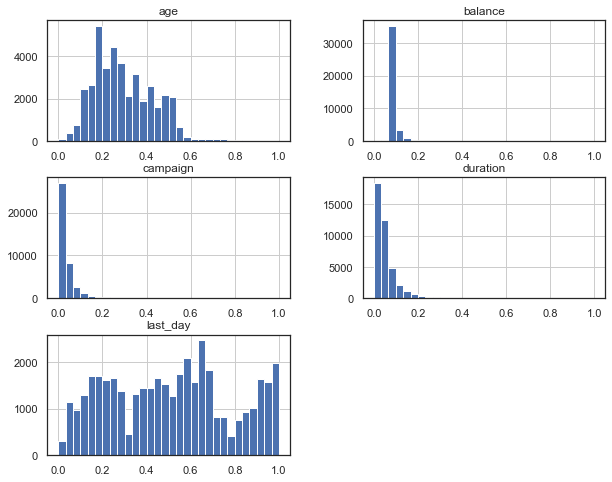

In [344]:
df[numerical_features].hist(bins=30, figsize=(10, 8))


ValueError: The number of passed axes must be 5, the same as the output plot

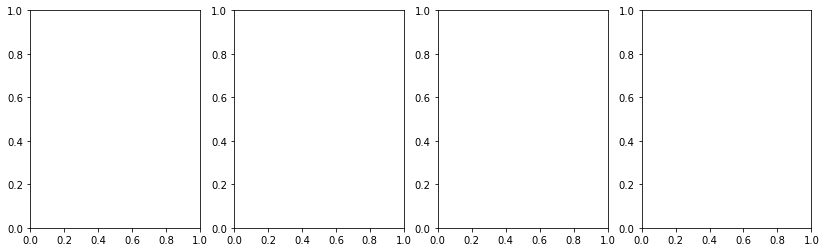

In [321]:
fig, ax = plt.subplots(1, 4, figsize=(14, 4))
df[Y == "No"][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[Y == "Yes"][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)


IndexError: index 3 is out of bounds for axis 0 with size 3

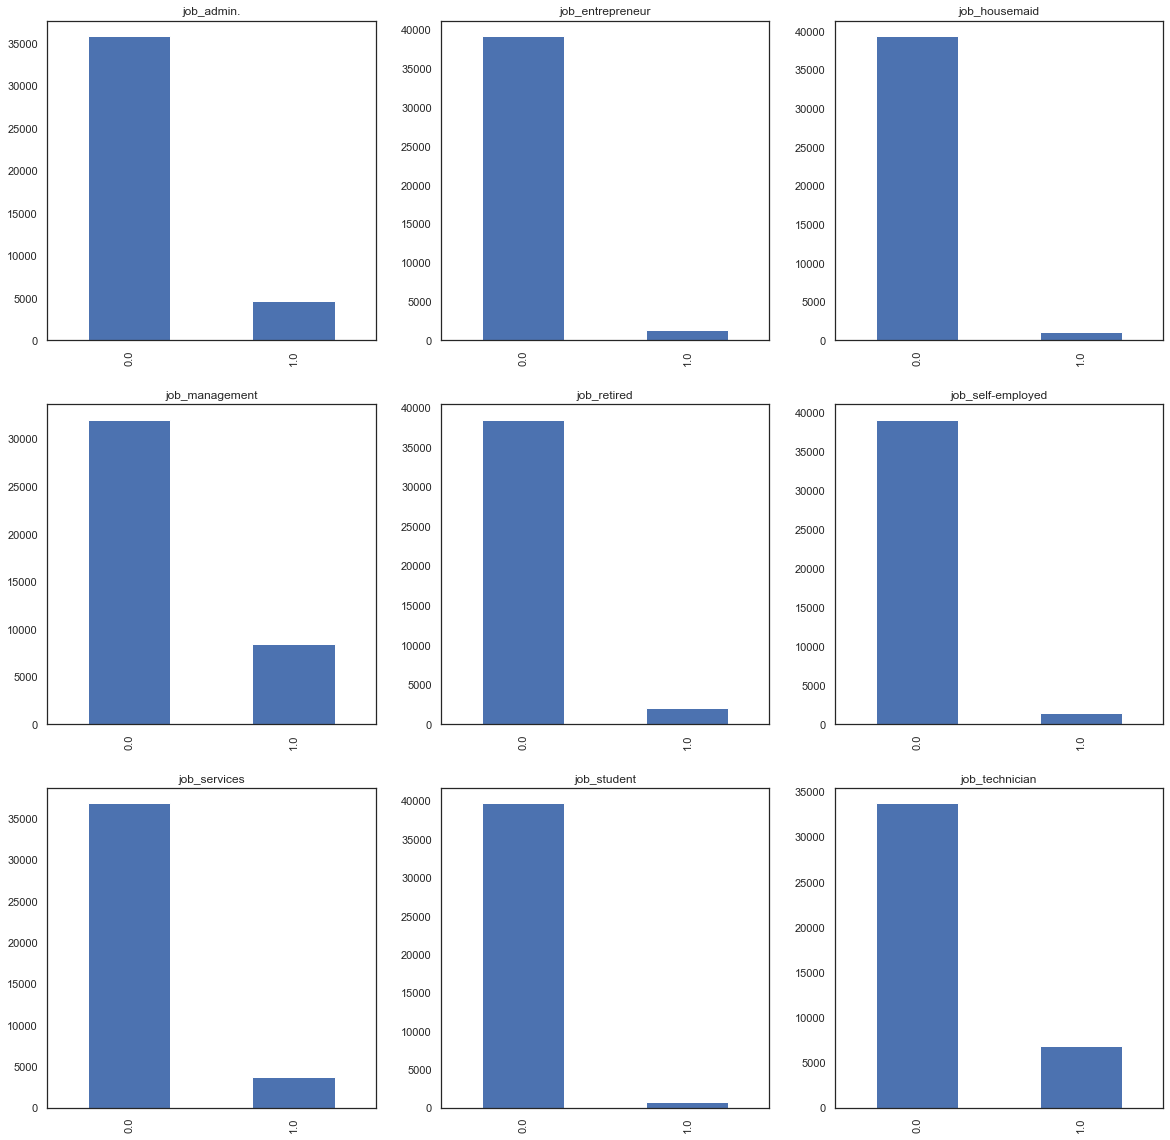

In [345]:


categorical_features = list(df)
categorical_features.remove('age')
categorical_features.remove('balance')
categorical_features.remove('duration')
categorical_features.remove('last_day')
categorical_features.remove('campaign')
categorical_features.remove('passdays')
categorical_features.remove('previous')

ROWS, COLS = 3,3
fig, ax = plt.subplots(ROWS, COLS, figsize=(20, 20))
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_feature].value_counts().plot('bar', ax=ax[row, col]).set_title(categorical_feature)


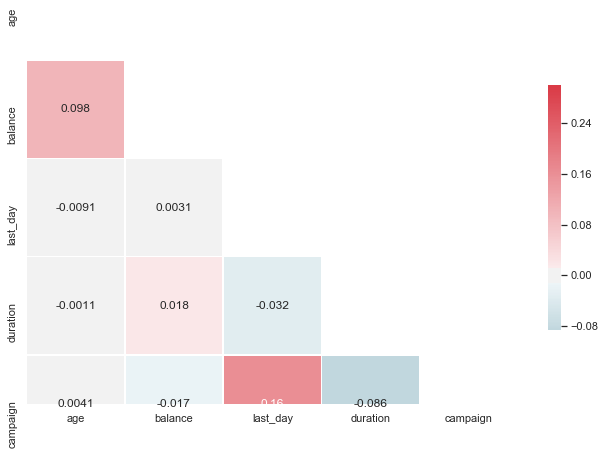

In [346]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = df[numerical_features]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


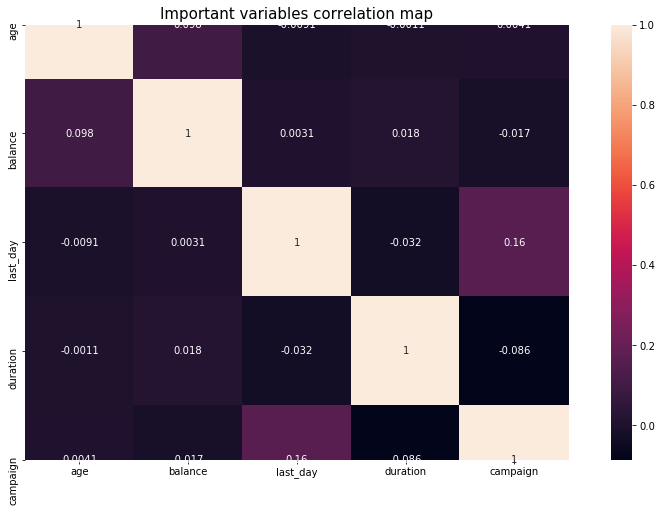

In [322]:
corrmat = X[numerical_features].corr(method='pearson')
f, ax = plt.subplots(figsize=(15, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True,annot= True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()


In [324]:
df.groupby(Y).mean()

,age,balance,last_day,duration,campaign,passdays,previous,job_admin.,job_entrepreneur,job_housemaid,...,last_month_jan,last_month_jul,last_month_mar,last_month_may,last_month_nov,last_month_oct,last_month_sep,poutcome_failure,poutcome_success,poutcome_unknown
target,,,,,,,,,,,,,,,,,,,,,
0,0.297017,0.084754,0.497039,0.045013,0.032470,0.042855,0.001833,0.114114,0.034064,0.028675,...,0.031998,0.157113,0.005808,0.321541,0.089460,0.010415,0.007595,0.106603,0.013681,0.840821
1,0.308132,0.089158,0.470467,0.108248,0.019966,0.080955,0.004250,0.118687,0.021734,0.021308,...,0.027062,0.120179,0.047731,0.167483,0.072235,0.061368,0.051566,0.118048,0.186661,0.636054


#### Observations:
1. The average age of customers who bought the data plan is higher than that of the customers who didn’t.
# 2. The passdays (days since the customer was last contacted) is understandably lower for the customers who bought it. 
# 3. The lower the passdays, the better the memory of the last call and hence the better chances of a sale. Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.


In [327]:
0.03>0.01

True

In [352]:
sns.distplot(data['job'],kde = False)
plt.show()


TypeError: list indices must be integers or slices, not str

In [284]:
import plotly.graph_objects as go
import numpy as np

x0 = X['balance']
x1 = Y # shift mean

fig = go.Figure()
# Use x instead of y argument for horizontal plot
fig.add_trace(go.Box(x=x0))
fig.add_trace(go.Box(x=x1))

fig.show()


In [285]:
X.shape

(40508, 40)

In [286]:
Y.shape

(40508,)

# SMOTE

In [262]:
X

,age,balance,last_day,duration,campaign,passdays,previous,job_admin.,job_entrepreneur,job_housemaid,...,last_month_jan,last_month_jul,last_month_mar,last_month_may,last_month_nov,last_month_oct,last_month_sep,poutcome_failure,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,51,229,5,353,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,57,52,5,38,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40503,25,505,17,386,2,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
40504,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
40505,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,0,1,0,0,0,1,0
40506,57,668,17,508,4,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [264]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
40503    1
40504    1
40505    1
40506    0
40507    0
Name: target, Length: 40508, dtype: int64

In [265]:
os = SMOTE(random_state=42)
os_X, os_Y = os.fit_sample(df,Y)


In [268]:
os_X = pd.DataFrame(data=os_X,columns=list(df))

# No more class imbalance

In [269]:
np.mean(os_Y)

0.5

In [272]:
os_Y = pd.DataFrame(data=os_Y, columns=['target'])

In [273]:
os_Y

,target
0,0
1,0
2,0
3,0
4,0
...,...
71625,1
71626,1
71627,1
71628,1


In [274]:
os_X

,age,balance,last_day,duration,campaign,passdays,previous,job_admin.,job_entrepreneur,job_housemaid,...,last_month_jan,last_month_jul,last_month_mar,last_month_may,last_month_nov,last_month_oct,last_month_sep,poutcome_failure,poutcome_success,poutcome_unknown
0,0.519481,0.092259,0.133333,0.053070,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.337662,0.073067,0.133333,0.030704,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.194805,0.072822,0.133333,0.015453,0.000000,0.000000,0.000000,0.000000,1.0,0.0,...,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.428571,0.074882,0.133333,0.071777,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.506494,0.073275,0.133333,0.007727,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71625,0.677292,0.076895,0.433333,0.080281,0.000000,0.251100,0.009807,0.000000,0.0,0.0,...,0.0,0.848529,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
71626,0.353932,0.087894,0.387509,0.060385,0.000000,0.207711,0.004999,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
71627,0.742421,0.076924,0.227248,0.199729,0.014341,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
71628,0.319037,0.084654,0.155071,0.029439,0.000000,0.112186,0.008379,0.000000,0.0,0.0,...,0.0,0.000000,0.347864,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [275]:
os_X.shape

(71630, 40)

In [276]:
os_Y.shape

(71630, 1)